<a href="https://colab.research.google.com/github/Sukhi02/ML-Content/blob/main/Chapter%2013%20Clustering%20implementation/Chapter_13_Clustering_implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import os
os.chdir("/content/drive/MyDrive/CHapter ML")

/content/drive/MyDrive/CHapter ML


# Case Study 1: - Mall-Customer 

Importing the Libraries

In [66]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [67]:
#Importing the dataset
dataset = pd.read_csv('MallCustomerDataset.csv')  
X = dataset.iloc[:, [3, 4]].values

Using the elbow method to find the optimal number of clusters


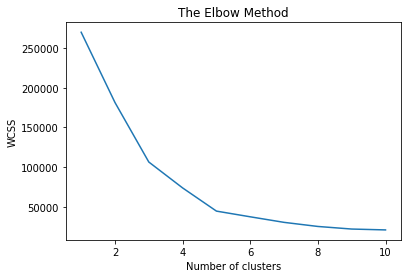

In [68]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means to the dataset

In [69]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

Visualizing the clusters

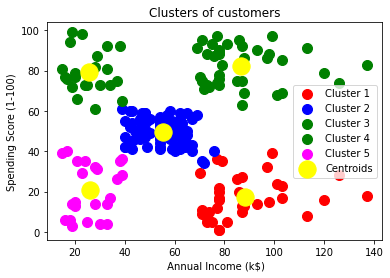

In [70]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0] , X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0] , X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Using the dendrogram to find the optimal number of clusters

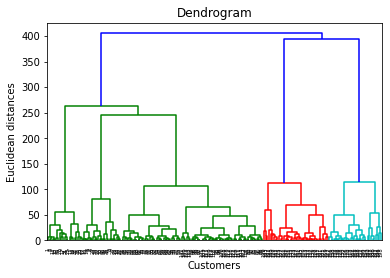

In [71]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_obj = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Training the Hierarchical Clustering model on the dataset

In [72]:
#Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing the clusters

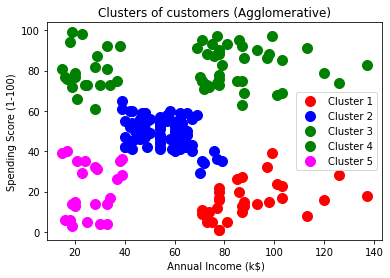

In [73]:
# Visualizing the clusters
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0] , X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0] , X[y_hc == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0] , X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers (Agglomerative)')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Visualizing the clusters

In [74]:
# Visualizing the clusters
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, y_hc)

NearestCentroid()

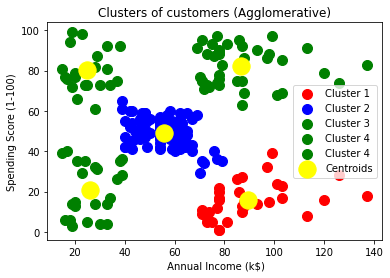

In [75]:
# Visualizing the clusters
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0] , X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0] , X[y_hc == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0] , X[y_hc == 4, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(clf.centroids_[:, 0], clf.centroids_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of customers (Agglomerative)')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Case Study 2: - US-Arrests

Importing the Libraries

In [76]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [77]:
#Importing the dataset
dataset = pd.read_csv('USArrests.csv')  

Using the elbow method to find the optimal number of clusters


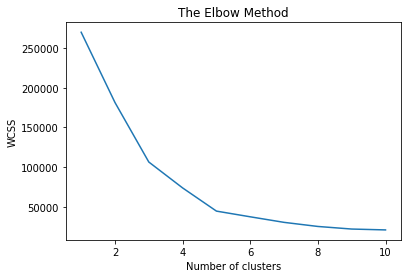

In [78]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means to the dataset

In [79]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

Visualizing the clusters

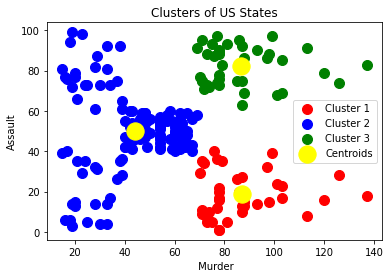

In [80]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,	c = 'yellow', label = 'Centroids')
plt.title('Clusters of US States')
plt.xlabel(' Murder')
plt.ylabel('Assault')
plt.legend()
plt.show() 

Using the dendrogram to find the optimal number of clusters

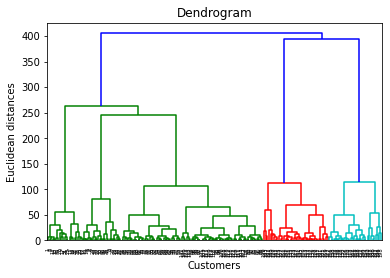

In [81]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_obj = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Training the Hierarchical Clustering model on the dataset

In [82]:
#Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 2, affinity = 'euclidean', 	linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Visualizing the clusters

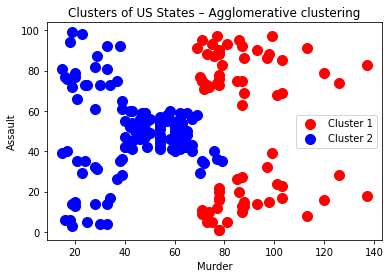

In [83]:
# Visualizing the clusters
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100, 
c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100, 
c = 'blue', label = 'Cluster 2')
plt.title('Clusters of US States – Agglomerative clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

# Case Study 3: - IRIS Dataset

Importing the Libraries

In [84]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [85]:
#Importing the dataset
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset['data'] 

Using the elbow method to find the optimal number of clusters


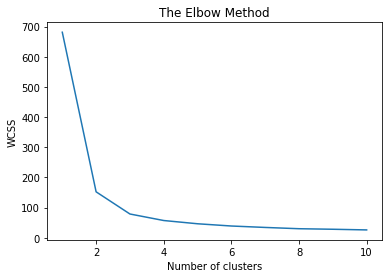

In [86]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
    random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means to the dataset

In [87]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)


Visualizing the clusters

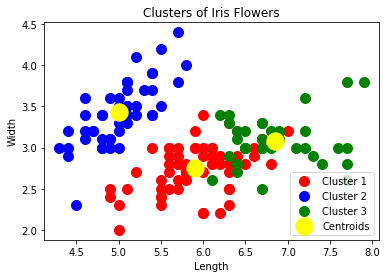

In [88]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,	c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Flowers')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show() 